In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import os

In [5]:
data_dir = r'C:\Users\seclab\Desktop\decodePayload\test'
pickle_list = []
for file_name in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file_name)
    pickle_list.append(file_path)

In [6]:
n = 8
detect_dict = dict()
for file_path in tqdm(pickle_list):
    with open(file_path, 'rb') as f:
        month_data = pickle.load(f)
    for event in tqdm(month_data, desc=os.path.split(file_path)[1]):
        detect = event['detectName'].replace('/',' ')
        decode_payload = event['decodePayload']
        analy_result = event['analyResult']
        if detect not in detect_dict:
            detect_dict[detect] = {}
        
        if decode_payload is not None:
            text = tuple(decode_payload)
            for x in range(0, len(text)-n+1):
                ngrams = "".join(list(text[x : x+n]))
                if ngrams not in detect_dict[detect]:
                    detect_dict[detect][ngrams] = {
                        "true_positive": 0,
                        "false_positive": 0,
                    }
                result = int(analy_result)
                if result == 1:
                    detect_dict[detect][ngrams]["true_positive"] += 1
                else:
                    detect_dict[detect][ngrams]["false_positive"] += 1

In [7]:
len(detect_dict)

94

In [11]:
c_df = pd.DataFrame(pd.read_csv("C:/Users/seclab/Desktop/correct_df.csv", encoding='UTF-8', low_memory=False))
w_df = pd.DataFrame(pd.read_csv("C:/Users/seclab/Desktop/wrong_df.csv", encoding='UTF-8', low_memory=False))

In [13]:
n = 8
c_event_table = dict()
for i in tqdm(range(len(c_df))):
    detect = c_df['detectName'][i]
    if detect not in c_event_table:
        c_event_table.setdefault(detect, dict())
    if c_df['decodePayload'][i] is not None:
        text = tuple(str(c_df['decodePayload'][i]))
        for x in range(0, len(text)-n+1):
            ngrams = "".join(list(text[x : x+n]))
            if ngrams not in c_event_table:
                c_event_table[detect].setdefault(ngrams, dict())
            result = int(c_df['analyResult'][i])
            if result == 1:
                c_event_table[detect][ngrams]["true_positive"] = c_event_table[detect][ngrams].get("true_positive", 0) + 1
            else:
                c_event_table[detect][ngrams]["false_positive"] = c_event_table[detect][ngrams].get("false_positive", 0) + 1

In [16]:
len(c_event_table)

94

In [15]:
n = 8
w_event_table = dict()
for i in tqdm(range(len(w_df))):
    detect = w_df['detectName'][i]
    if detect not in w_event_table:
        w_event_table.setdefault(detect, dict())
    if w_df['decodePayload'][i] is not None:
        text = tuple(str(w_df['decodePayload'][i]))
        for x in range(0, len(text)-n+1):
            ngrams = "".join(list(text[x : x+n]))
            if ngrams not in w_event_table:
                w_event_table[detect].setdefault(ngrams, dict())
            result = int(w_df['analyResult'][i])
            if result == 1:
                w_event_table[detect][ngrams]["true_positive"] = w_event_table[detect][ngrams].get("true_positive", 0) + 1
            else:
                w_event_table[detect][ngrams]["false_positive"] = w_event_table[detect][ngrams].get("false_positive", 0) + 1

In [17]:
len(w_event_table)

16

In [18]:
w_event_table.keys()

dict_keys(['Mail-PAT-Suspicious().19010302@', 'tcp port scan - flag ack', 'tcp port scan - flag fin ack (maimon)', 'Malware-PAT-ActiveX(G1).18112022@', 'Mail-PAT-Spear-Phishing(HOST).18102601@', 'Relay-IP-port().18102903@', 'Mail-PAT-Suspicious(DOM).18073102@', 'Malware-PAT-XMRig(miner).18101003@', '(CTEST)Attack-IP-Susp(J2).18111602@', 'Mail-PAT-02-00-login(china).10051402@', 'xmas scan', 'WEB-PAT-00-00-file(upload).05102701@', 'Web-PAT-Apache_Struts(CVE17-5638).17032201@', 'Malware-PAT-Beacon(Datper).17092401@', 'WEB-PAT-Script(WebClient).17092014@', '(CTEST)Relay-IP-C1(FR).18121203@'])

In [23]:
n = 8
ngram_dict = dict()
for file_path in tqdm(pickle_list):
    with open(file_path, 'rb') as f:
        month_data = pickle.load(f)
    for event in tqdm(month_data, desc=os.path.split(file_path)[1]):
#         detect = event['detectName'].replace('/',' ')
        decode_payload = event['decodePayload']
        analy_result = event['analyResult']
#         if detect not in detect_dict:
#             detect_dict[detect] = {}
        
        if decode_payload is not None:
            text = tuple(decode_payload)
            for x in range(0, len(text)-n+1):
                ngrams = "".join(list(text[x : x+n]))
                if ngrams not in ngram_dict:
                    ngram_dict[ngrams] = {
                        "true_positive": 0,
                        "false_positive": 0,
                    }
                result = int(analy_result)
                if result == 1:
                    ngram_dict[ngrams]["true_positive"] += 1
                else:
                    ngram_dict[ngrams]["false_positive"] += 1

In [25]:
len(ngram_dict)

13256700

In [31]:
ngram_df = pd.DataFrame(ngram_dict)

In [33]:
ngram_df.head()

,� @r�P, @r�PI,@r�PI�,@r�PI� ,r�PI�  ,�PI�   ,PI�    ,I�    X,I�    X-,�    X-R,..., ����Z�,����Z�a,���Z�ad,��Z�ad,��Z�ad�,�cK} P,cK} PA,K} PA,} PA , PA  
true_positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
false_positive,1,1,1,1,2,224,463,268,268,24044,...,1,1,1,1,1,1,1,1,1,1


In [35]:
ngram_df = np.transpose(ngram_df)

In [85]:
f_sorted_ngram_df = ngram_df.sort_values(by="false_positive",ascending=False).head(50)

In [86]:
t_sorted_ngram_df = ngram_df.sort_values(by="true_positive",ascending=False).head(50)

In [54]:
f_sorted_ngram_df

,true_positive,false_positive
\t\t\t\t\t\t\t\t,0,3399162
\n\t\t\t\t\t\t\t,0,2444453
\r\nAccept,6878,1401801
\t\t\t\t\t//,0,1129679
", image/",686,986835
...,...,...
rer: htt,534,459306
ead.php?,0,458971
/read.ph,0,458970
.php?id=,0,458747


In [55]:
t_sorted_ngram_df

,true_positive,false_positive
________,149316,1234
"c"":""2.0""",59731,0
",""method",59731,0
""",""metho",59731,0
"method"":",59731,0
...,...,...
"n/1"",""cn",55633,0
"""cn/1"",""",55633,0
""",""cn/xt",55633,0
"""cn/xtl""",55633,0


C:\Users\seclab\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seclab\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seclab\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\seclab\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


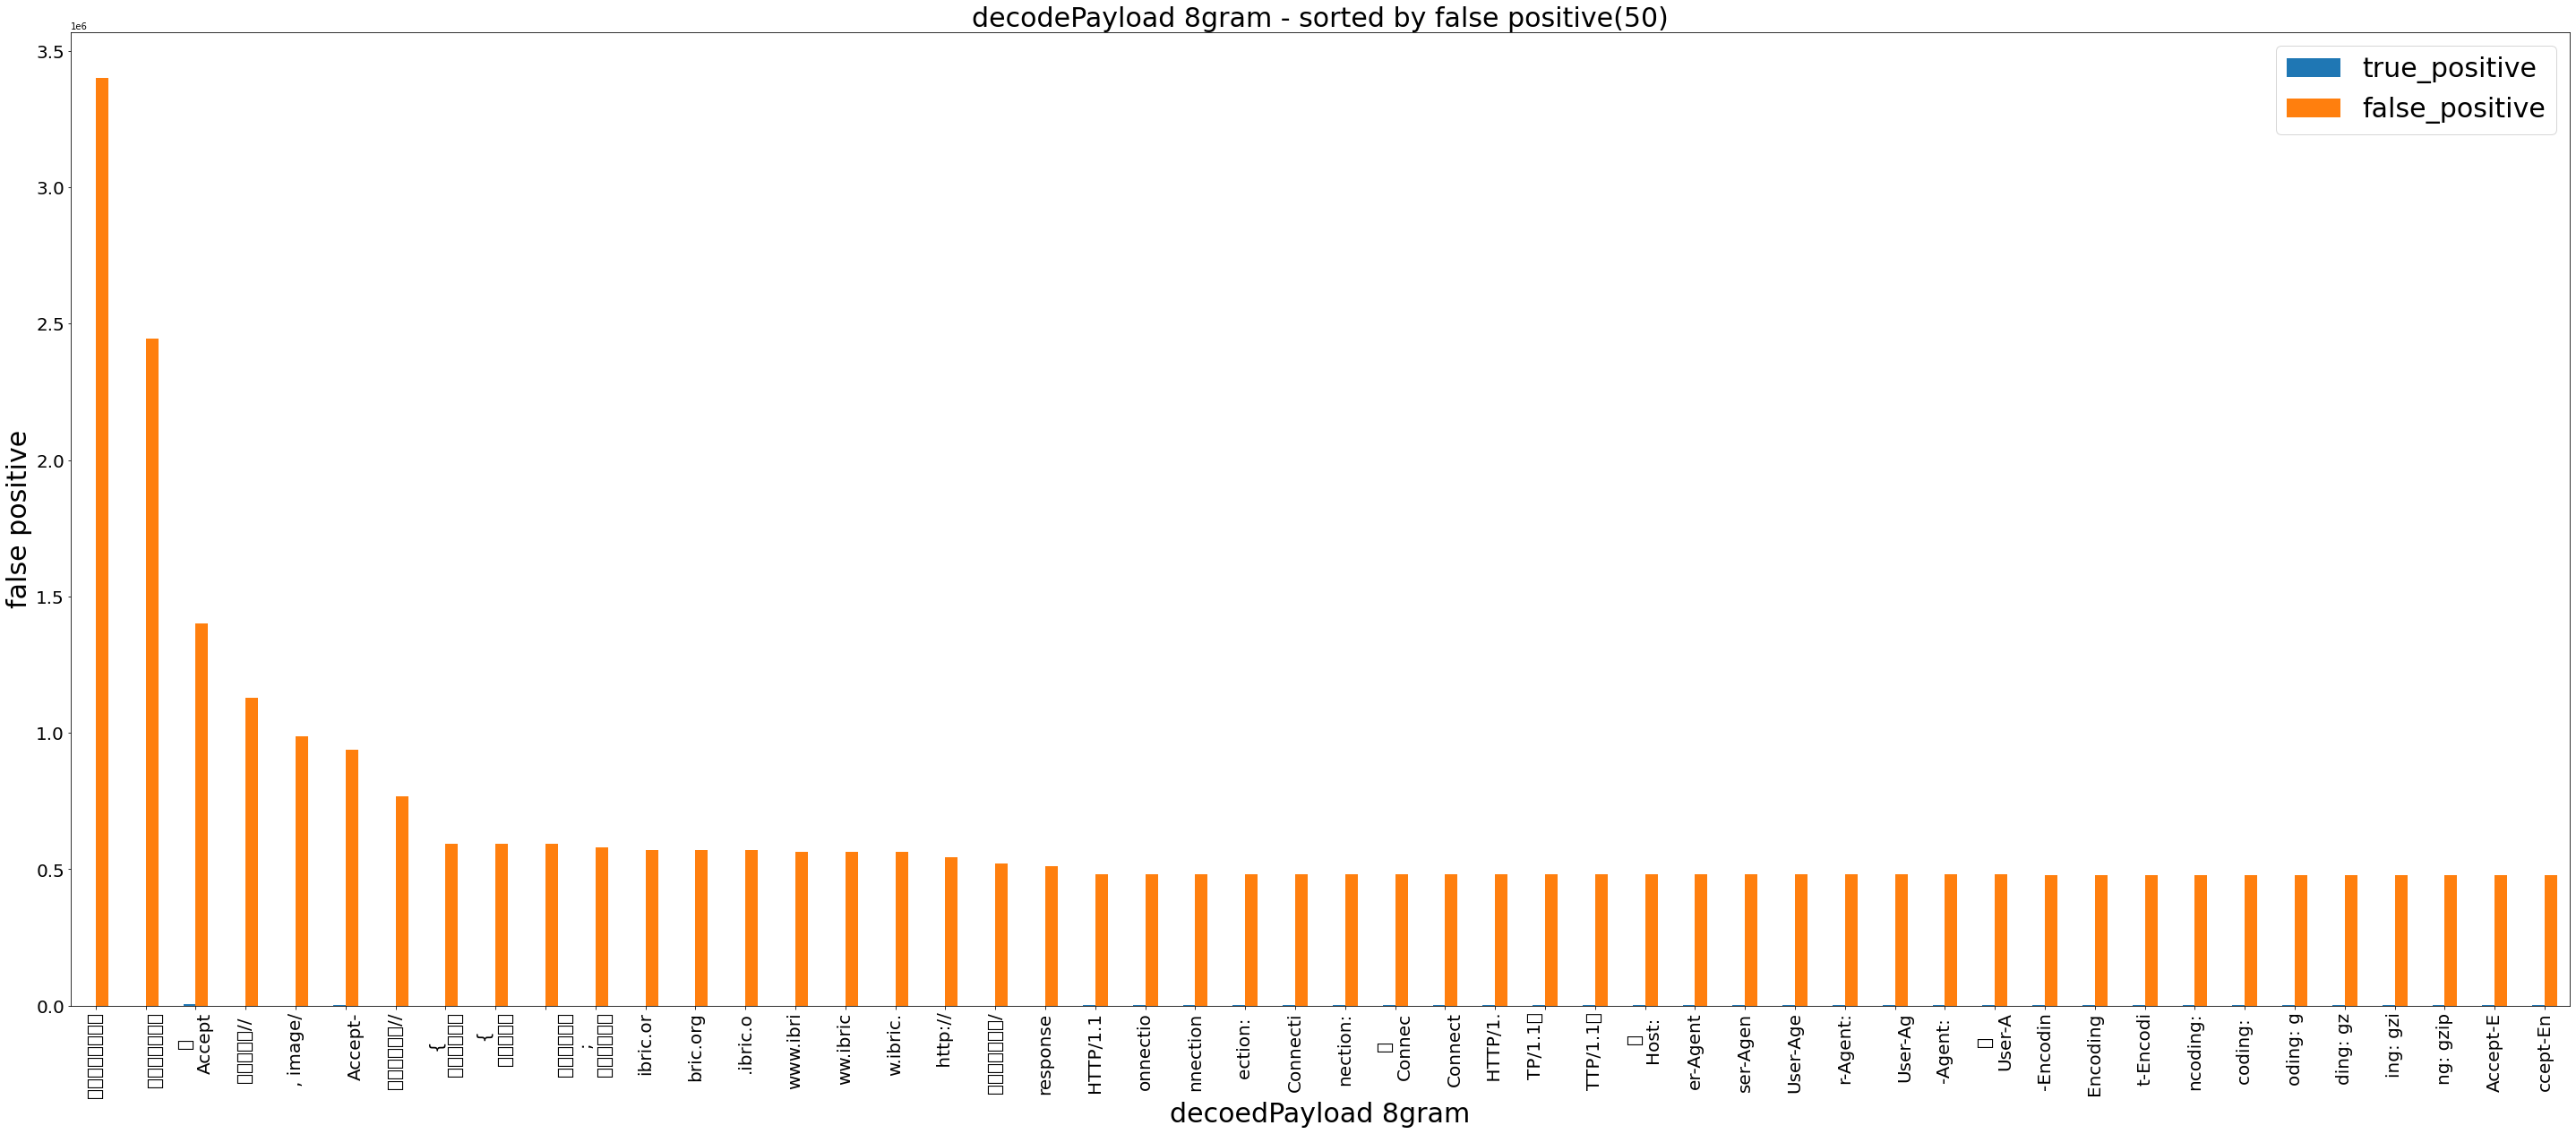

In [120]:
f_sorted_ngram_df.plot(kind='bar', figsize=(50,20))
plt.xlabel('decoedPayload 8gram',size=30)
plt.ylabel('false positive', size=30)
plt.title('decodePayload 8gram - sorted by false positive(50)', size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 <a list of 9 Text major ticklabel objects>)

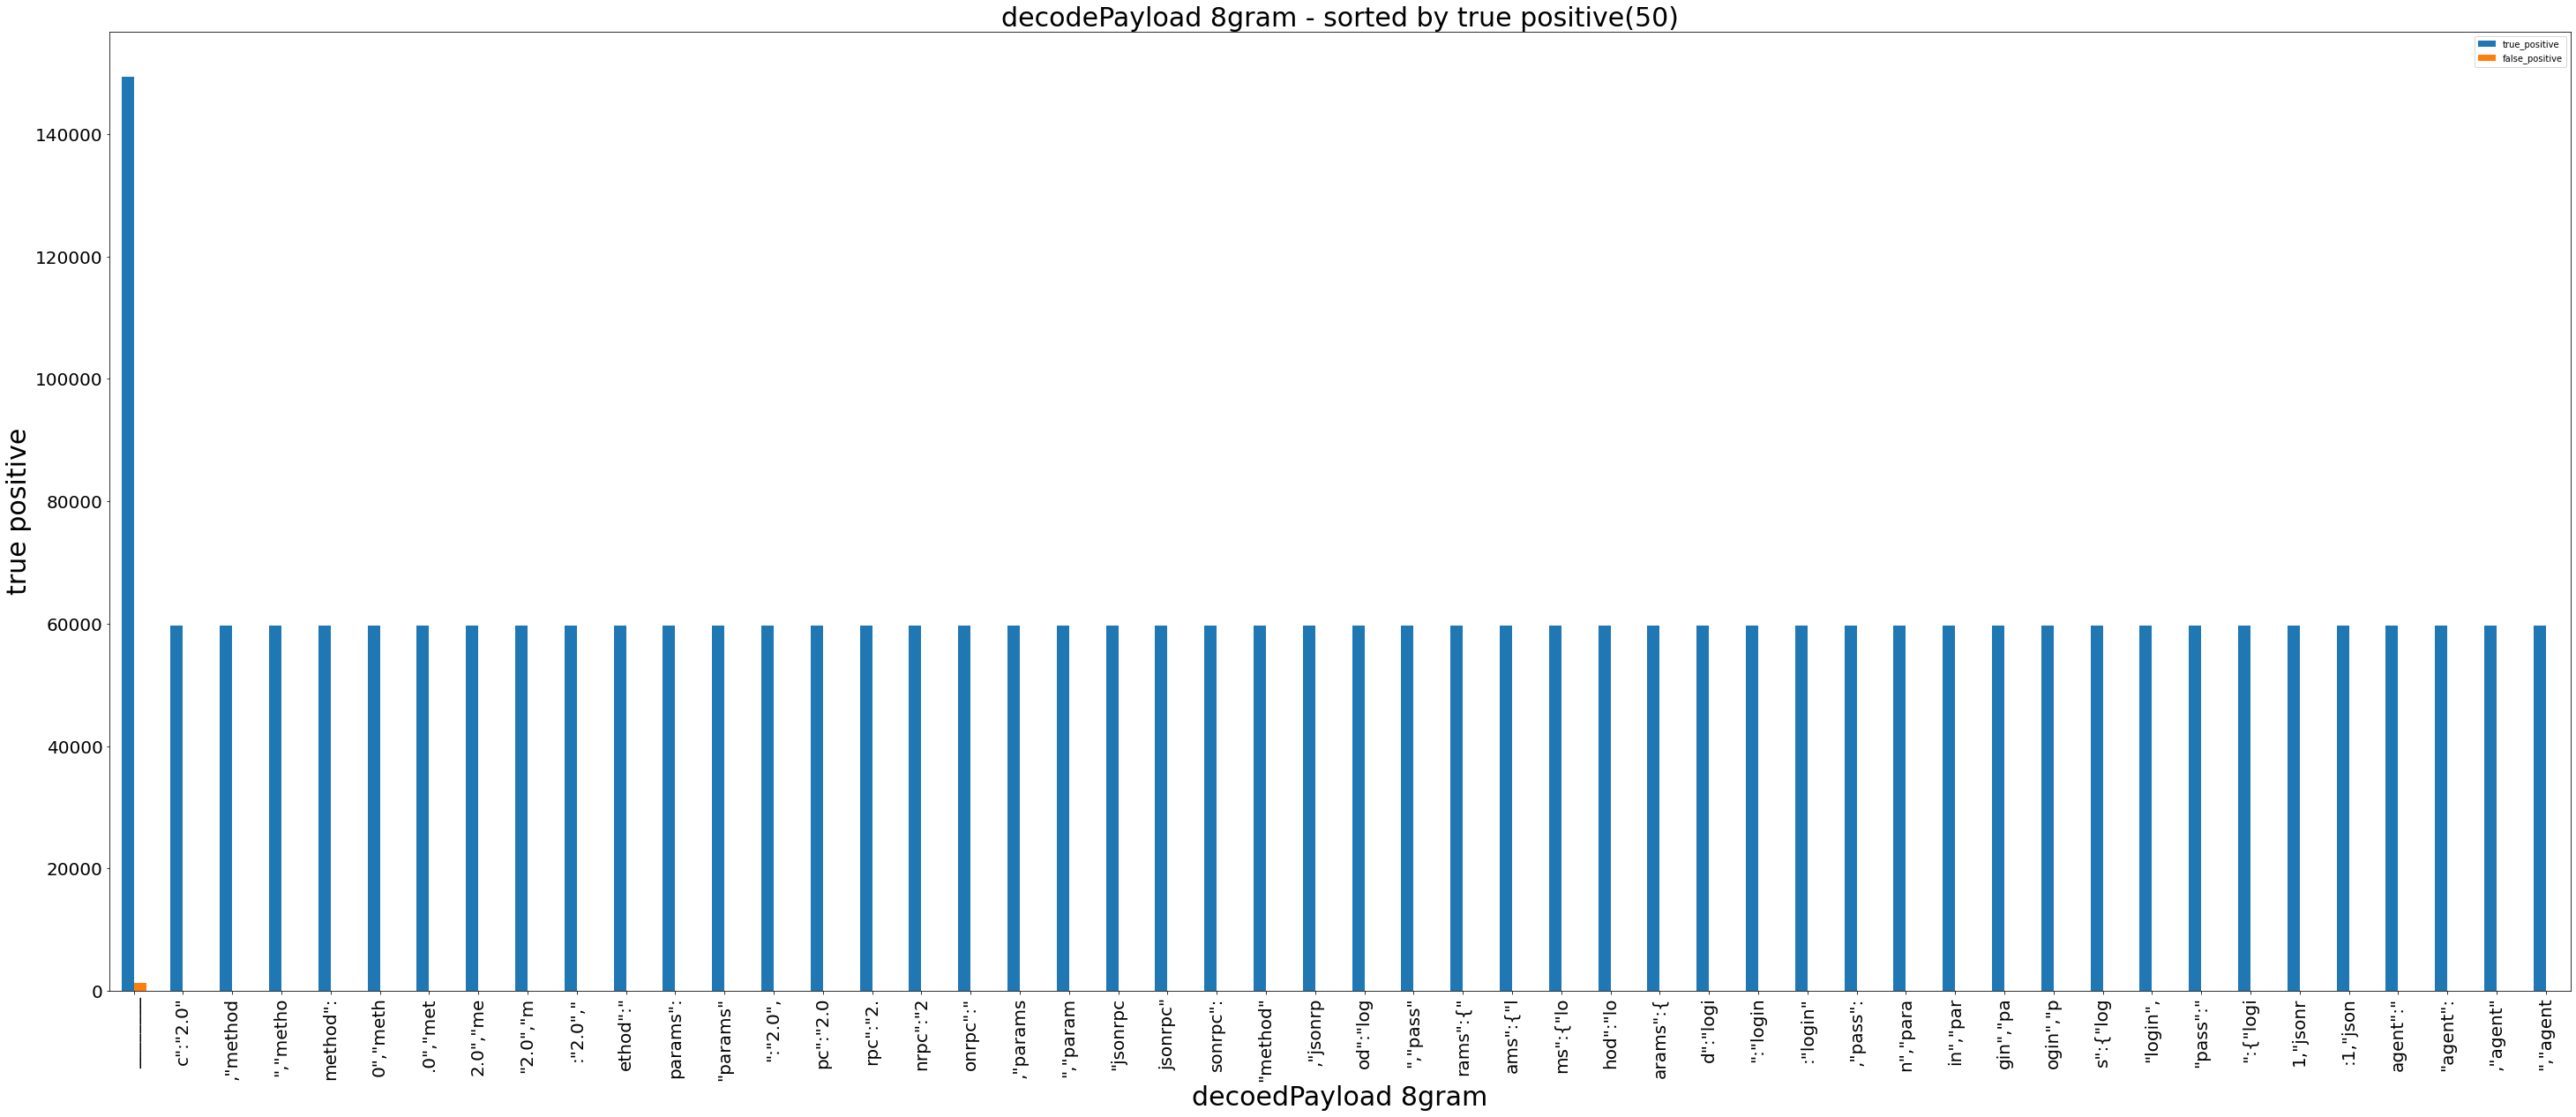

In [90]:
t_sorted_ngram_df.plot(kind='bar', figsize=(50,20))
plt.xlabel('decoedPayload 8gram',size=30)
plt.ylabel('true positive', size=30)
plt.title('decodePayload 8gram - sorted by true positive(50)', size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [93]:
w_ngram_df = pd.DataFrame(w_event_table)

In [94]:
w_ngram_df

,Mail-PAT-Suspicious().19010302@,tcp port scan - flag ack,tcp port scan - flag fin ack (maimon),Malware-PAT-ActiveX(G1).18112022@,Mail-PAT-Spear-Phishing(HOST).18102601@,Relay-IP-port().18102903@,Mail-PAT-Suspicious(DOM).18073102@,Malware-PAT-XMRig(miner).18101003@,(CTEST)Attack-IP-Susp(J2).18111602@,Mail-PAT-02-00-login(china).10051402@,xmas scan,WEB-PAT-00-00-file(upload).05102701@,Web-PAT-Apache_Struts(CVE17-5638).17032201@,Malware-PAT-Beacon(Datper).17092401@,WEB-PAT-Script(WebClient).17092014@,(CTEST)Relay-IP-C1(FR).18121203@
GET /upl,{'false_positive': 58},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ET /uplo,{'false_positive': 58},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T /uploa,{'false_positive': 58},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/upload,{'false_positive': 58},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/upload/,{'false_positive': 59},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
�:%��S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'false_positive': 1}
�:%��S�,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'false_positive': 1}
:%��S�,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'false_positive': 1}
%��S�0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'false_positive': 1}


In [124]:
n = 8
tp = 0
fp = 0
w_event_table = dict()
for i in tqdm(range(len(w_df))):
    if w_df['decodePayload'][i] is not None:
        text = tuple(str(w_df['decodePayload'][i]))
        for x in range(0, len(text)-n+1):
            ngrams = "".join(list(text[x : x+n]))
            if ngrams not in w_event_table:
                w_event_table.setdefault(ngrams, dict())
            result = int(w_df['analyResult'][i])
            if result == 1:
                w_event_table[ngrams]["true_positive"] = w_event_table[ngrams].get("true_positive", 0) + 1
                tp += 1
            else:
                w_event_table[ngrams]["false_positive"] = w_event_table[ngrams].get("false_positive", 0) + 1
                fp += 1

In [125]:
tp, fp

(20422, 343728)

In [97]:
w_ngram_df = pd.DataFrame(w_event_table)

In [100]:
w_ngram_df

,false_positive,true_positive
GET /upl,58.0,NaN
ET /uplo,58.0,NaN
T /uploa,58.0,NaN
/upload,58.0,NaN
/upload/,59.0,NaN
...,...,...
"=""qpk.as",1.0,NaN
"""qpk.asp",1.0,NaN
�cK} P,1.0,NaN
cK} PA,1.0,NaN


In [99]:
w_ngram_df = w_ngram_df.transpose()

In [121]:
wt_sorted_ngram_df = w_ngram_df.sort_values(by="true_positive",ascending=False).head(50)

In [122]:
wt_sorted_ngram_df

,false_positive,true_positive
________,NaN,122.0
"nt"":""XMR",NaN,57.0
"""id"":1,""",NaN,57.0
",""pass"":",NaN,57.0
""",""pass""",NaN,57.0
"login"":""",NaN,57.0
"""login"":",NaN,57.0
"{""login""",NaN,57.0
"{""id"":1,",NaN,57.0
"id"":1,""j",NaN,57.0


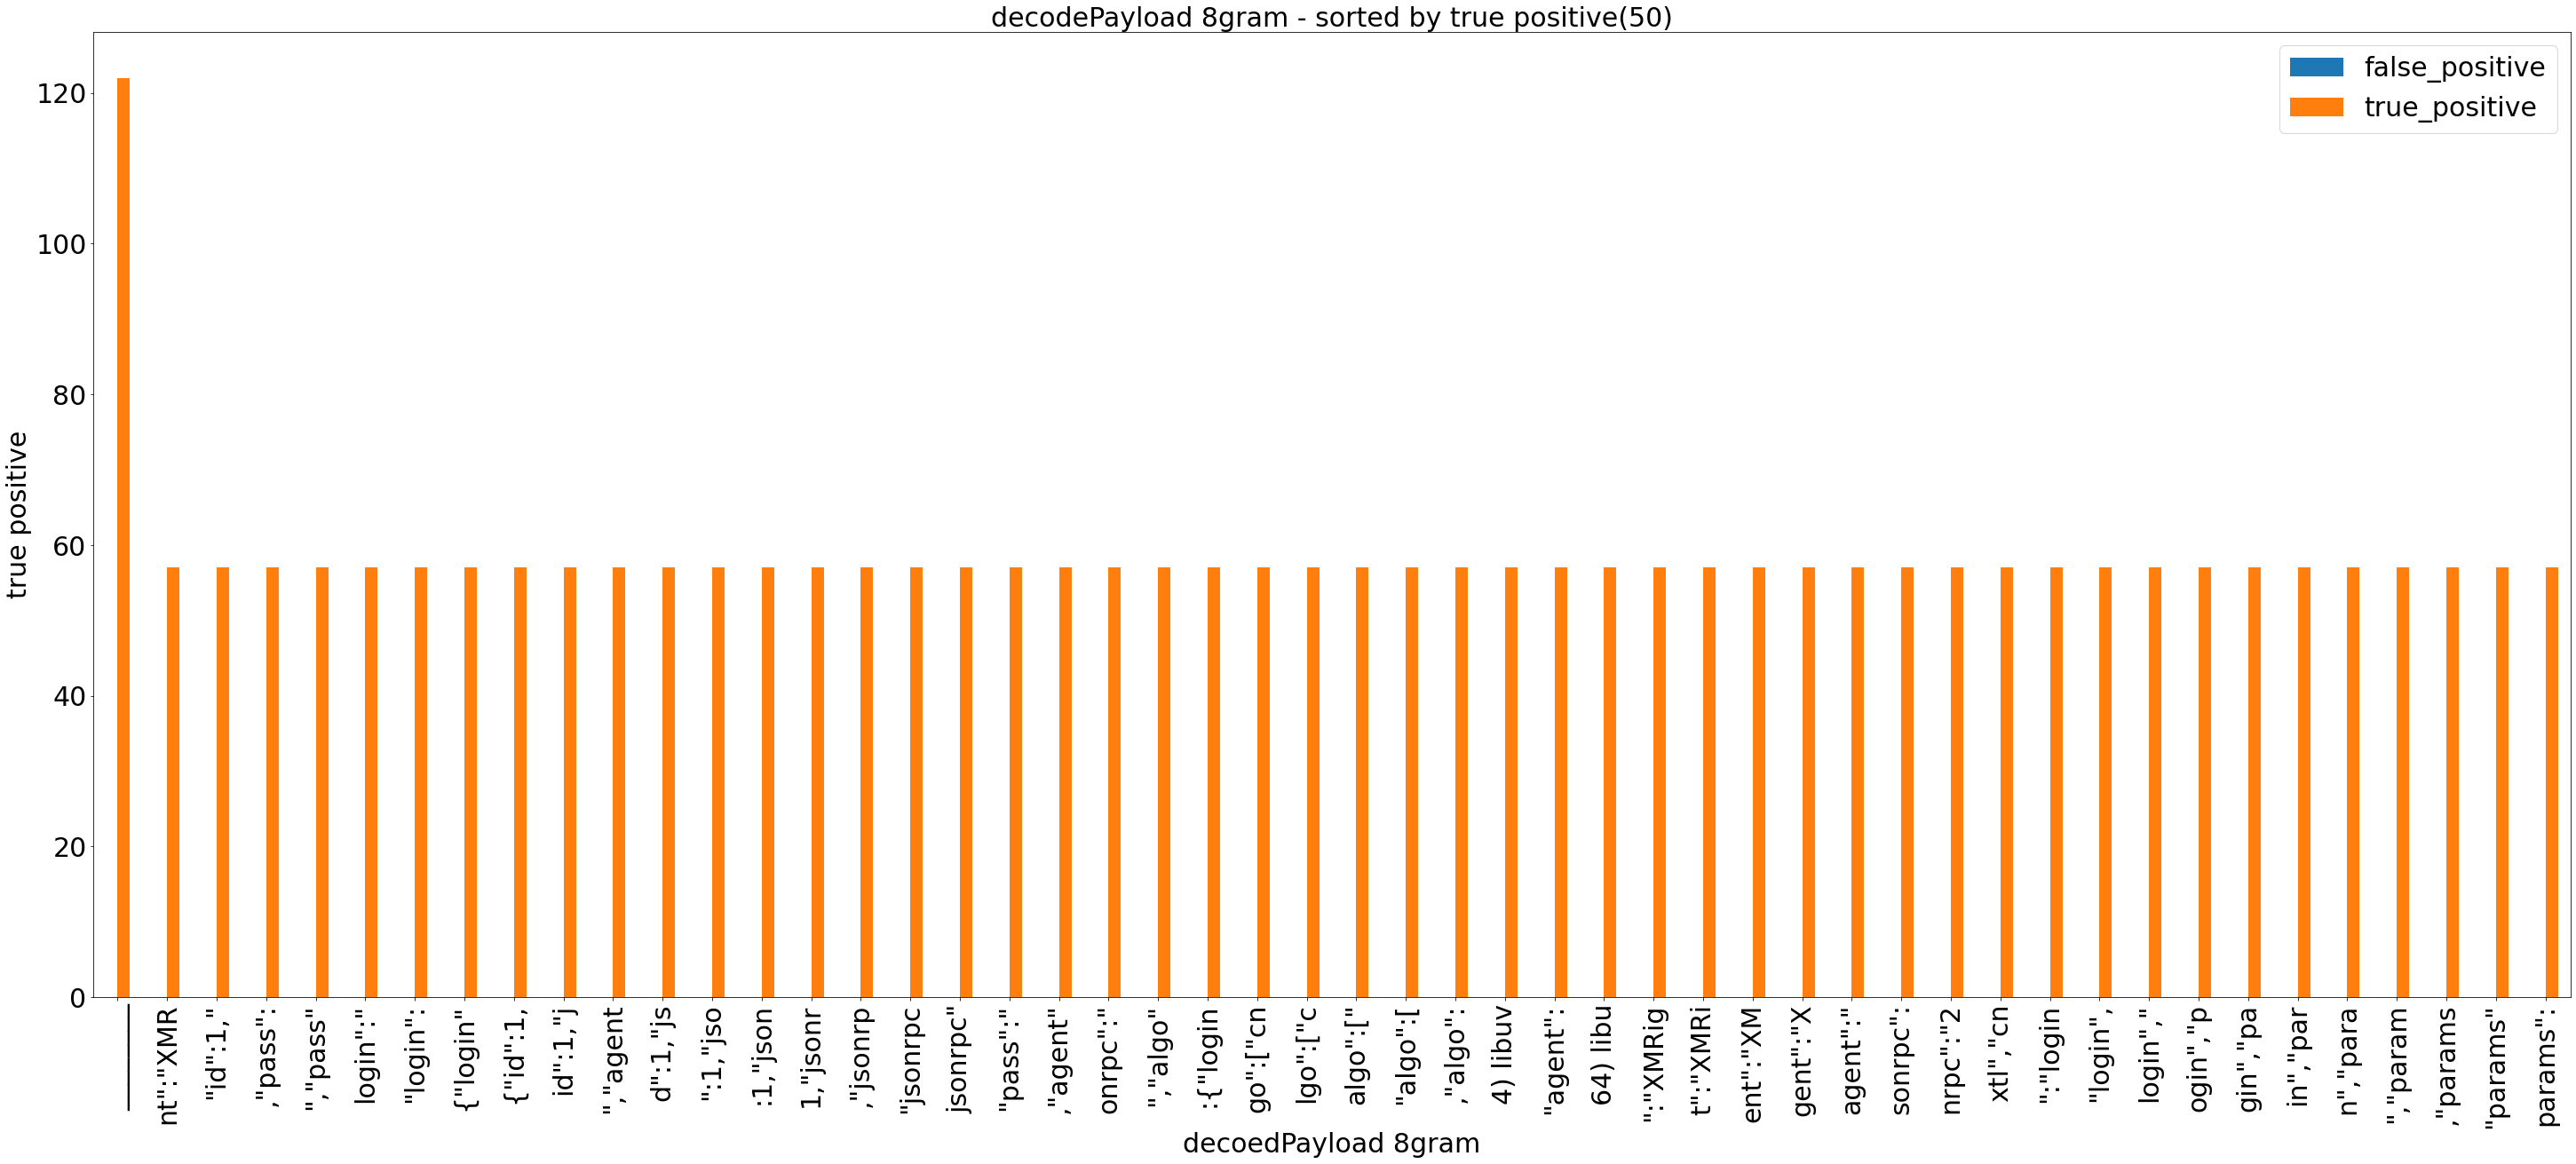

In [123]:
wt_sorted_ngram_df.plot(kind='bar', figsize=(50,20))
plt.xlabel('decoedPayload 8gram',size=30)
plt.ylabel('true positive', size=30)
plt.title('decodePayload 8gram - sorted by true positive(50)', size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)

In [103]:
wf_sorted_ngram_df = w_ngram_df.sort_values(by="false_positive",ascending=False).head(50)

In [111]:
wf_sorted_ngram_df

,false_positive,true_positive
", image/",1265.0,NaN
\nAccept-,1259.0,2.0
bric.org,760.0,NaN
ibric.or,760.0,NaN
.ibric.o,760.0,NaN
w.ibric.,756.0,NaN
ww.ibric,756.0,NaN
www.ibri,756.0,NaN
HTTP/1.1,645.0,1.0
HTTP/1.,644.0,1.0


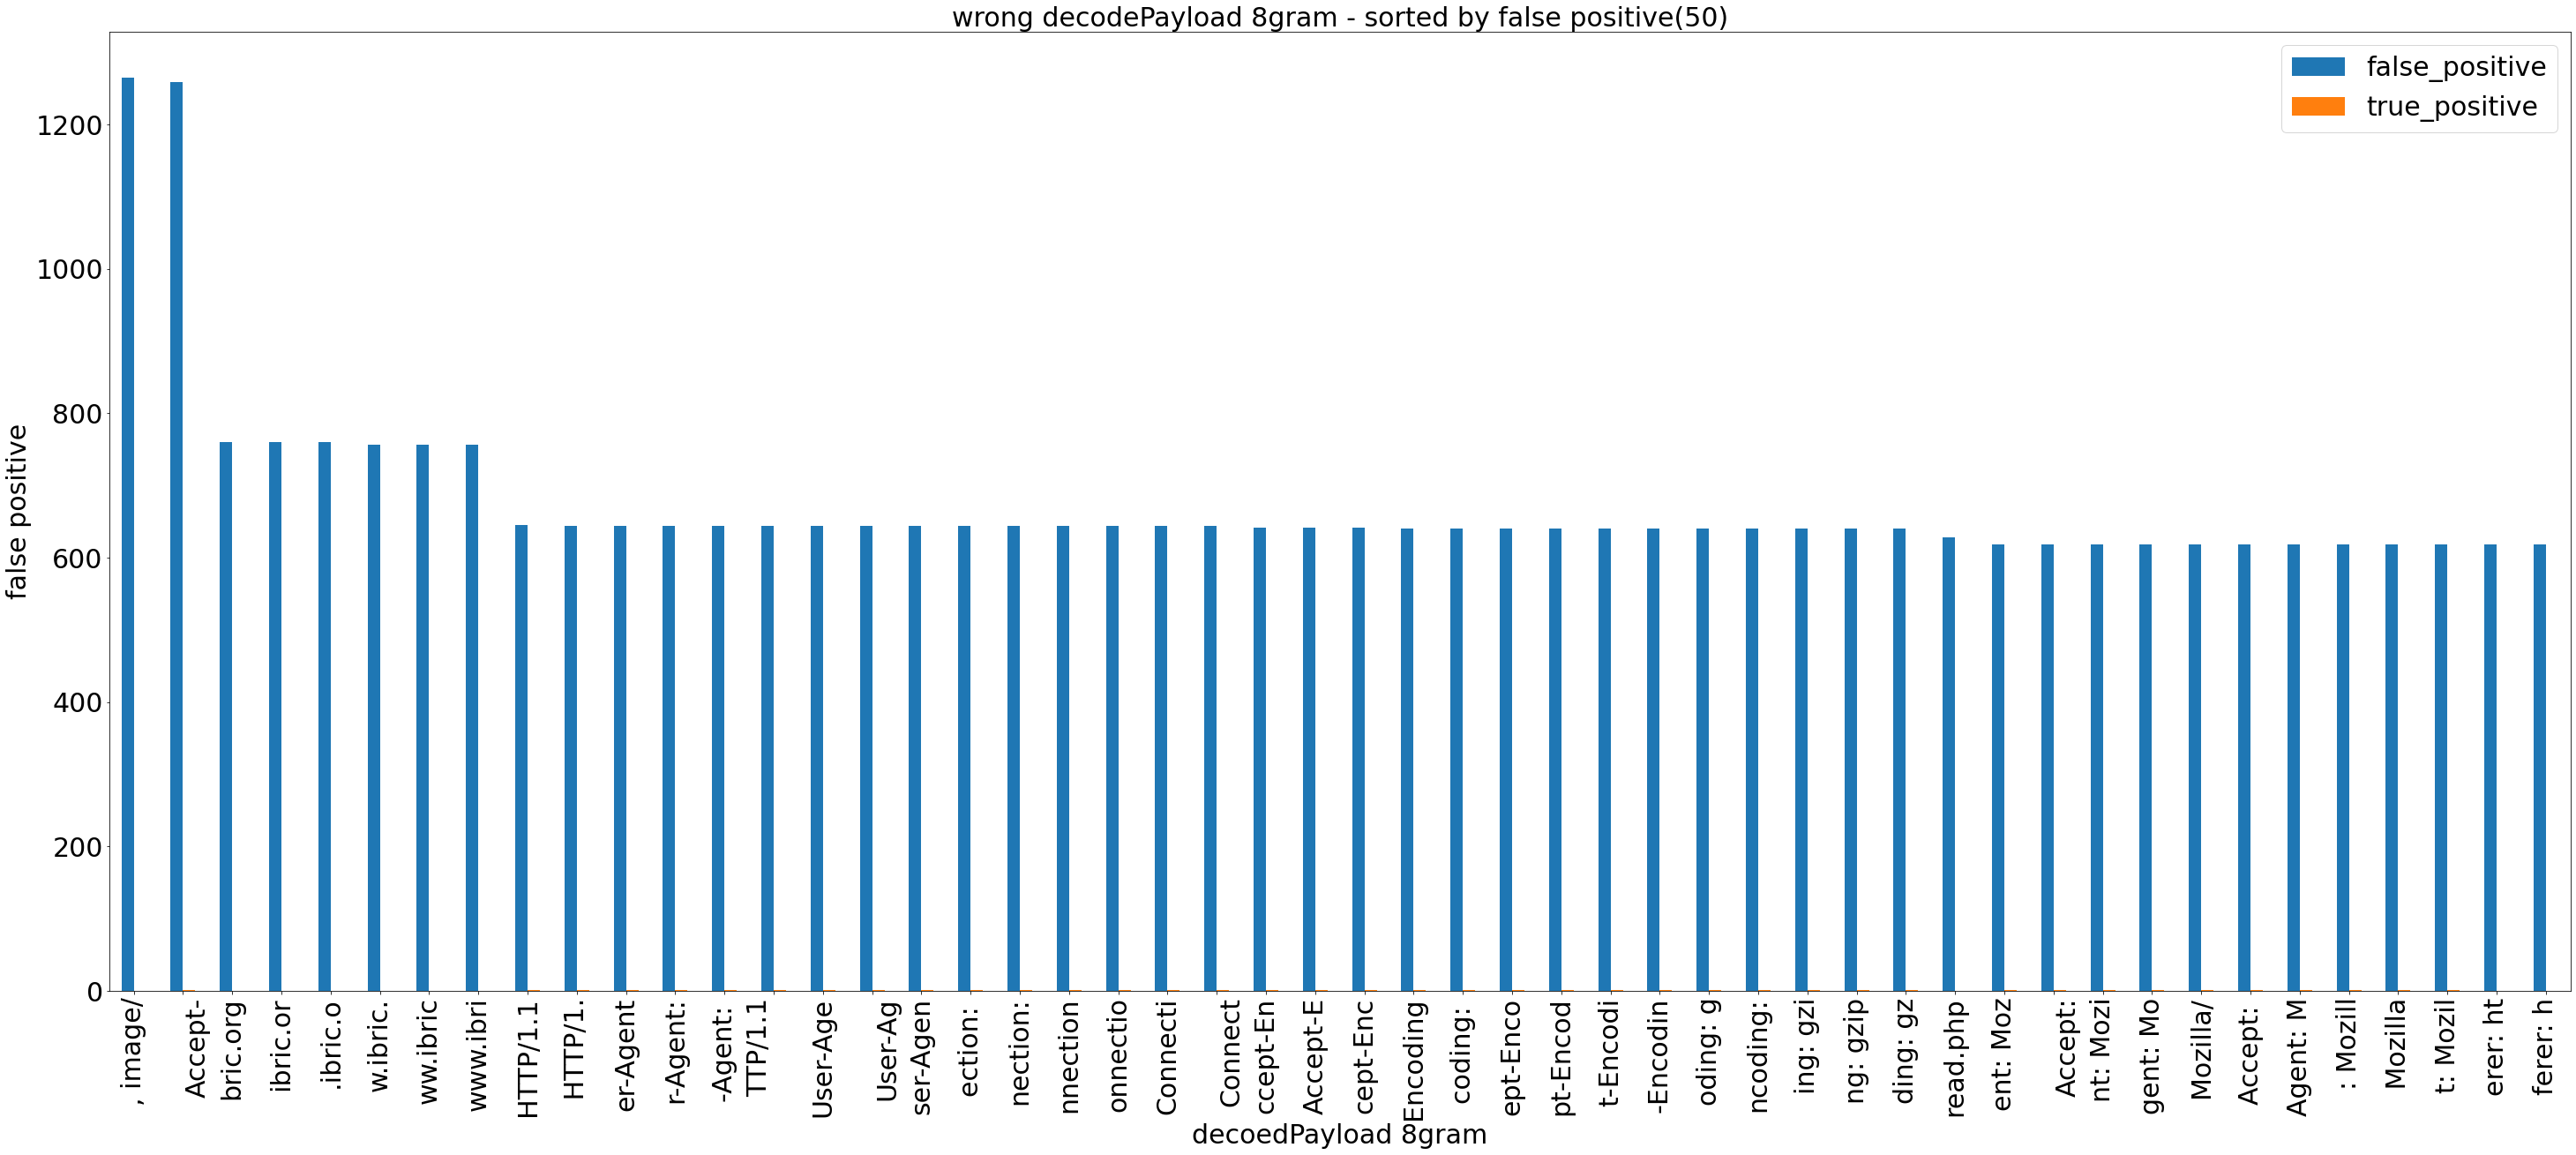

In [118]:
wf_sorted_ngram_df.plot(kind='bar', figsize=(50,20))
plt.xlabel('decoedPayload 8gram',size=30)
plt.ylabel('false positive', size=30)
plt.title('wrong decodePayload 8gram - sorted by false positive(50)', size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)

In [129]:
w_df['analyResult'][0]

2

In [133]:
tp = 0; fp = 0
for i in tqdm(range(len(w_df))):
    if w_df['analyResult'][i] == 2:
        fp += 1
    else:
        tp += 1

In [134]:
tp, fp

(58, 899)

In [138]:
wf= wf_sorted_ngram_df.transpose()

In [139]:
wf.keys()

Index([', image/', '\nAccept-', 'bric.org', 'ibric.or', '.ibric.o', 'w.ibric.',
       'ww.ibric', 'www.ibri', 'HTTP/1.1', ' HTTP/1.', 'er-Agent', 'r-Agent:',
       '-Agent: ', 'TTP/1.1\n', 'User-Age', '\nUser-Ag', 'ser-Agen',
       'ection: ', 'nection:', 'nnection', 'onnectio', 'Connecti', '\nConnect',
       'ccept-En', 'Accept-E', 'cept-Enc', 'Encoding', 'coding: ', 'ept-Enco',
       'pt-Encod', 't-Encodi', '-Encodin', 'oding: g', 'ncoding:', 'ing: gzi',
       'ng: gzip', 'ding: gz', 'read.php', 'ent: Moz', '\nAccept:', 'nt: Mozi',
       'gent: Mo', 'Mozilla/', 'Accept: ', 'Agent: M', ': Mozill', ' Mozilla',
       't: Mozil', 'erer: ht', 'ferer: h'],
      dtype='object')

In [140]:
wt = wt_sorted_ngram_df.transpose()

In [141]:
wt.keys()

Index(['________', 'nt":"XMR', '"id":1,"', ',"pass":', '","pass"', 'login":"',
       '"login":', '{"login"', '{"id":1,', 'id":1,"j', '","agent', 'd":1,"js',
       '":1,"jso', ':1,"json', '1,"jsonr', ',"jsonrp', '"jsonrpc', 'jsonrpc"',
       '"pass":"', ',"agent"', 'onrpc":"', '","algo"', ':{"login', 'go":["cn',
       'lgo":["c', 'algo":["', '"algo":[', ',"algo":', '4) libuv', '"agent":',
       '64) libu', '":"XMRig', 't":"XMRi', 'ent":"XM', 'gent":"X', 'agent":"',
       'sonrpc":', 'nrpc":"2', 'xtl","cn', '":"login', '"login",', 'login","',
       'ogin","p', 'gin","pa', 'in","par', 'n","para', '","param', ',"params',
       '"params"', 'params":'],
      dtype='object')

In [144]:
wt

,________,"nt"":""XMR","""id"":1,""",",""pass"":",""",""pass""","login"":""","""login"":","{""login""","{""id"":1,","id"":1,""j",...,"""login"",","login"",""","ogin"",""p","gin"",""pa","in"",""par","n"",""para",""",""param",",""params","""params""","params"":"
false_positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
true_positive,122.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,...,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0


In [147]:
swt = set(wt.keys())
swf = set(wf.keys())

In [149]:
swt & swf

set()

In [153]:
n = 8
w_event_table = dict()
for i in tqdm(range(len(w_df))):
    if w_df['decodePayload'][i] is not None:
        text = tuple(str(w_df['decodePayload'][i]))
        for x in range(0, len(text)-n+1):
            ngrams = "".join(list(text[x : x+n]))
            if ngrams == '________':
                print(i)

519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519



In [154]:
w_df['decodePayload'][519]

'GET /mail/PutAck.jsp?ack_args=c2VudF9maWxlPWJqcnl1QGtpZ2FtLnJlLmtyLy5TZW50LzE1MzQ4MTU2MTUyNTguOTM0NDUua2lnYW0mc2VuZF9kYXRlPTIwMTgwODIxMTA0MDE1JnN1YmplY3Q9UmU6T3VyIG1vbml0b3JpbmcgcGFwZXIgKFRPQyBvZiB0aGUgVUJHSDIgc3BlY2lhbCBpc3N1ZSk=&to_email=lipingliu1004@126.com_________________________________________________________________________________________________________________________________ HTTP/1.1\nHost: webmail.kigam.re.kr\nConnection: keep-alive\nAccept: image/webp,image/*,*/*;q=0.8\nAccept-Language: zh-CN\nUser-Agent: Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.110 Safari/537.36\nAccept-Encoding: gzip, deflate\n\n'